<a href="https://colab.research.google.com/github/Bablu0420/Excelr/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
bank=pd.read_csv('/content/bank-full.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,59,management,married,tertiary,no,553.0,yes,no,cellular,7.0,jul,1272.0,3.0,-1.0,0.0,unknown,yes
12736,31,admin.,single,secondary,no,92.0,yes,no,cellular,7.0,jul,401.0,2.0,-1.0,0.0,unknown,no
12737,42,blue-collar,divorced,unknown,no,0.0,no,no,cellular,7.0,jul,64.0,2.0,-1.0,0.0,unknown,no
12738,45,blue-collar,divorced,primary,no,1805.0,no,no,cellular,7.0,jul,758.0,1.0,-1.0,0.0,unknown,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        12740 non-null  int64  
 1   job        12740 non-null  object 
 2   marital    12739 non-null  object 
 3   education  12739 non-null  object 
 4   default    12739 non-null  object 
 5   balance    12739 non-null  float64
 6   housing    12739 non-null  object 
 7   loan       12739 non-null  object 
 8   contact    12739 non-null  object 
 9   day        12739 non-null  float64
 10  month      12739 non-null  object 
 11  duration   12739 non-null  float64
 12  campaign   12739 non-null  float64
 13  pdays      12739 non-null  float64
 14  previous   12739 non-null  float64
 15  poutcome   12739 non-null  object 
 16  y          12739 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 1.7+ MB


In [6]:
data1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_jul,month_jun,month_may
0,58,no,2143.0,yes,no,5.0,261.0,1.0,-1.0,0.0,...,0,1,0,0,0,1,1,0,0,1
1,44,no,29.0,yes,no,5.0,151.0,1.0,-1.0,0.0,...,1,0,0,0,0,1,1,0,0,1
2,33,no,2.0,yes,yes,5.0,76.0,1.0,-1.0,0.0,...,1,0,0,0,0,1,1,0,0,1
3,47,no,1506.0,yes,no,5.0,92.0,1.0,-1.0,0.0,...,0,0,1,0,0,1,1,0,0,1
4,33,no,1.0,no,no,5.0,198.0,1.0,-1.0,0.0,...,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,59,no,553.0,yes,no,7.0,1272.0,3.0,-1.0,0.0,...,0,1,0,1,0,0,1,1,0,0
12736,31,no,92.0,yes,no,7.0,401.0,2.0,-1.0,0.0,...,1,0,0,1,0,0,1,1,0,0
12737,42,no,0.0,no,no,7.0,64.0,2.0,-1.0,0.0,...,0,0,1,1,0,0,1,1,0,0
12738,45,no,1805.0,no,no,7.0,758.0,1.0,-1.0,0.0,...,0,0,0,1,0,0,1,1,0,0


In [7]:
pd.set_option("display.max.columns", None)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_sel,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_jul,month_jun,month_may
0,58,no,2143.0,yes,no,5.0,261.0,1.0,-1.0,0.0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
1,44,no,29.0,yes,no,5.0,151.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
2,33,no,2.0,yes,yes,5.0,76.0,1.0,-1.0,0.0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,47,no,1506.0,yes,no,5.0,92.0,1.0,-1.0,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
4,33,no,1.0,no,no,5.0,198.0,1.0,-1.0,0.0,no,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,59,no,553.0,yes,no,7.0,1272.0,3.0,-1.0,0.0,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
12736,31,no,92.0,yes,no,7.0,401.0,2.0,-1.0,0.0,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0
12737,42,no,0.0,no,no,7.0,64.0,2.0,-1.0,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0
12738,45,no,1805.0,no,no,7.0,758.0,1.0,-1.0,0.0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12740 non-null  int64  
 1   default              12739 non-null  object 
 2   balance              12739 non-null  float64
 3   housing              12739 non-null  object 
 4   loan                 12739 non-null  object 
 5   day                  12739 non-null  float64
 6   duration             12739 non-null  float64
 7   campaign             12739 non-null  float64
 8   pdays                12739 non-null  float64
 9   previous             12739 non-null  float64
 10  y                    12739 non-null  object 
 11  job_admin.           12740 non-null  uint8  
 12  job_blue-collar      12740 non-null  uint8  
 13  job_entrepreneur     12740 non-null  uint8  
 14  job_housemaid        12740 non-null  uint8  
 15  job_management       12740 non-null 

In [9]:
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_sel,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown,month_jul,month_jun,month_may
0,58,0,2143.0,1,0,5.0,261.0,1.0,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
1,44,0,29.0,1,0,5.0,151.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
2,33,0,2.0,1,1,5.0,76.0,1.0,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,47,0,1506.0,1,0,5.0,92.0,1.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
4,33,0,1.0,0,0,5.0,198.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,59,0,553.0,1,0,7.0,1272.0,3.0,-1.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
12736,31,0,92.0,1,0,7.0,401.0,2.0,-1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0
12737,42,0,0.0,0,0,7.0,64.0,2.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0
12738,45,0,1805.0,0,0,7.0,758.0,1.0,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0


In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12740 non-null  int64  
 1   default              12740 non-null  int64  
 2   balance              12739 non-null  float64
 3   housing              12740 non-null  int64  
 4   loan                 12740 non-null  int64  
 5   day                  12739 non-null  float64
 6   duration             12739 non-null  float64
 7   campaign             12739 non-null  float64
 8   pdays                12739 non-null  float64
 9   previous             12739 non-null  float64
 10  y                    12740 non-null  int64  
 11  job_admin.           12740 non-null  uint8  
 12  job_blue-collar      12740 non-null  uint8  
 13  job_entrepreneur     12740 non-null  uint8  
 14  job_housemaid        12740 non-null  uint8  
 15  job_management       12740 non-null 

In [32]:
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

In [33]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [40]:
x = pd.DataFrame(x)

In [41]:
# Check for missing values
print(x.isnull().sum())
print(y.isnull().sum())

# Check the data types
print(x.dtypes)
print(y.dtypes)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
dtype: int64
0
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
dtype: object
int64


In [43]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [45]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
12735,1,1
12736,0,0
12737,0,0
12738,0,1


In [46]:
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[12170,    94],
       [  345,   131]])

In [47]:
(39156+1162)/(39156+766+4127+1162)

0.8917741257658535

In [48]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0
classifier.predict_proba(x)[:,1]

array([0.00363386, 0.00296762, 0.00335601, ..., 0.03417492, 0.51728839,
       0.09213042])

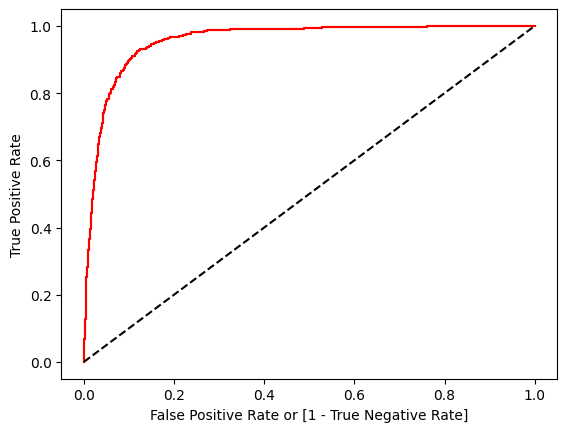

auc accuracy: 0.6337726871570545


In [49]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)